In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("charging_sessions.csv")

In [30]:
df.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [3]:
fehlende_werte = df.isnull().sum()
print(fehlende_werte)

Unnamed: 0              0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4088
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17263
userInputs          17263
dtype: int64


In [5]:
z_scores = stats.zscore(df["connectionTime"])
ausreißer = df[(z_scores > 3) | (z_scores < -3)]
print(ausreißer)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

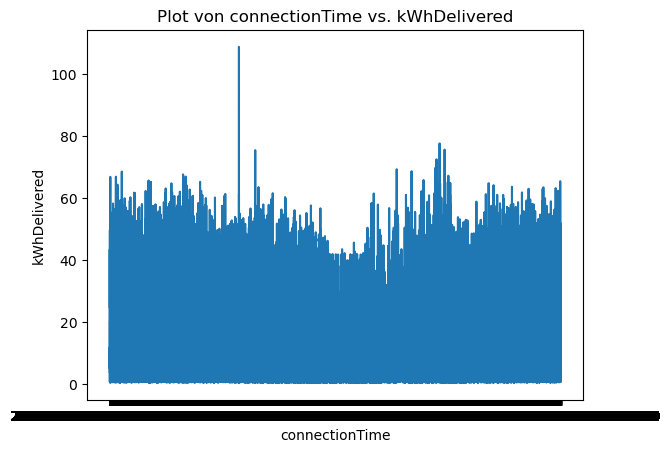

In [7]:
plt.plot(df['connectionTime'], df['kWhDelivered'])
plt.xlabel("connectionTime")
plt.ylabel("kWhDelivered")
plt.title("Plot von connectionTime vs. kWhDelivered")
plt.show()

Untersuchen der Anmeldungen von Kunden pro Site

In [12]:
user_counts_by_site = df.groupby('siteID')['userID'].count()
user_counts_by_site

siteID
1    32815
2    16372
Name: userID, dtype: int64

In [28]:
entries_without_user_id_by_site = df[df['userID'].isnull()].groupby('siteID').size()
entries_without_user_id_by_site

siteID
1     2227
2    15036
dtype: int64

Ladevorgänge pro Standort

In [31]:
charging_sessions_per_site = df['siteID'].value_counts()
charging_sessions_per_site

siteID
1    35042
2    31408
Name: count, dtype: int64

Durchschnittliche kWh pro Site

In [32]:
average_kWh_per_site = df.groupby('siteID')['kWhDelivered'].mean()
average_kWh_per_site

siteID
1    14.063156
2     9.249425
Name: kWhDelivered, dtype: float64

C:\Users\tim7l\AppData\Local\Temp\ipykernel_44636\348093766.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  entries_without_user_id_per_month = df.groupby(df['connectionTime'].dt.to_period('M')).size()


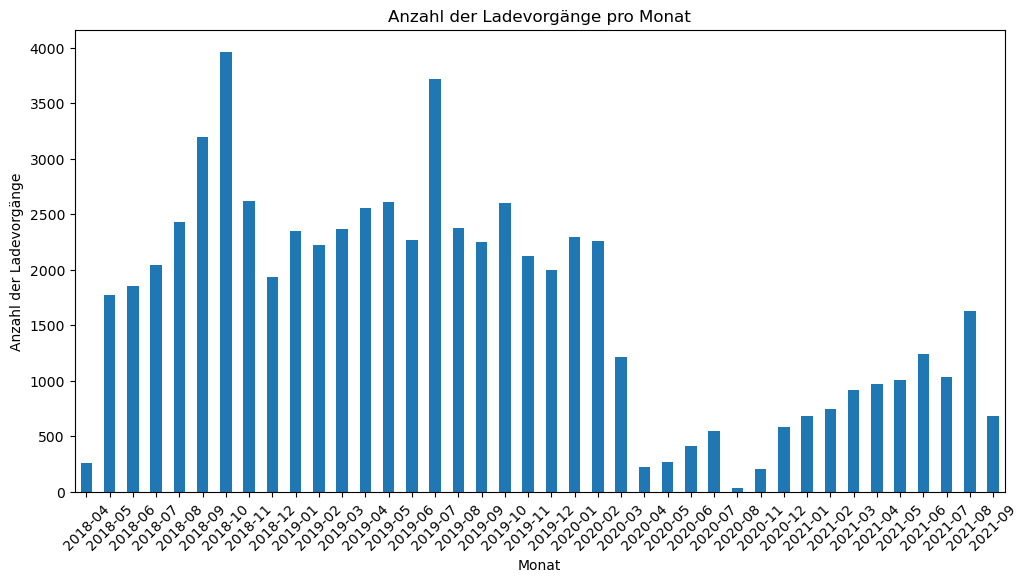

In [36]:
# Konvertiere die Verbindungsspalte (connectionTime) zu einem Datumsformat und extrahiere das Jahr und den Monat
df['connectionTime'] = pd.to_datetime(df['connectionTime'], errors='coerce')

# Filtern der Einträge ohne userID und Gruppieren nach Jahr und Monat
entries_without_user_id_per_month = df.groupby(df['connectionTime'].dt.to_period('M')).size()

entries_without_user_id_per_month.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Monat")
plt.ylabel("Anzahl der Ladevorgänge")
plt.title("Anzahl der Ladevorgänge pro Monat")
plt.xticks(rotation=45)
plt.show()